## Univeriate Selection

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../Projects/cardio_train.csv', sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
x = df.drop(['cardio'], axis=1)

In [5]:
x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [6]:
y = df['cardio']

In [7]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [9]:
# create object
fit_features = SelectKBest(score_func=f_classif)

In [10]:
# train the model
fit_features.fit(x, y)

SelectKBest()

In [11]:
# scores/importance of all column
score_col = pd.DataFrame(fit_features.scores_, columns=['score value'])

In [12]:
score_col

,score value
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [13]:
name_col = pd.DataFrame(x.columns)

In [14]:
name_col

,0
0,id
1,age
2,gender
3,height
4,weight
5,ap_hi
6,ap_lo
7,cholesterol
8,gluc
9,smoke


In [15]:
top_features = pd.concat([name_col, score_col], axis=1)

In [16]:
top_features

,0,score value
0,id,1.010461
1,age,4209.007957
2,gender,4.603641
3,height,8.197397
4,weight,2388.777887
5,ap_hi,208.339524
6,ap_lo,303.629011
7,cholesterol,3599.361137
8,gluc,562.772977
9,smoke,16.790541


In [17]:
# view top features column
top_features.nlargest(8, 'score value')

,0,score value
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


## Feature Importance

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
model = ExtraTreesClassifier()

In [20]:
model.fit(x, y)

ExtraTreesClassifier()

In [21]:
# view feature import
model.feature_importances_

array([0.15962643, 0.20581102, 0.00556096, 0.13642819, 0.14787542,
       0.16961439, 0.10478696, 0.04508383, 0.01160007, 0.00385337,
       0.00445955, 0.00529982])

In [22]:
# view series wise column names
top = pd.Series(model.feature_importances_, index= x.columns)

In [23]:
top

id             0.159626
age            0.205811
gender         0.005561
height         0.136428
weight         0.147875
ap_hi          0.169614
ap_lo          0.104787
cholesterol    0.045084
gluc           0.011600
smoke          0.003853
alco           0.004460
active         0.005300
dtype: float64

## Plot the Data

<Axes: >

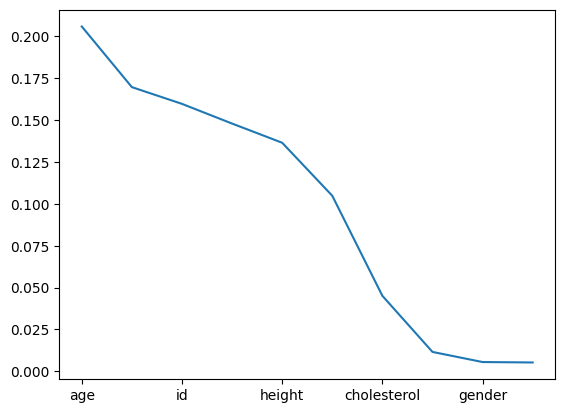

In [25]:
# plot the data for top 10 features
top.nlargest(10).plot()

<Axes: >

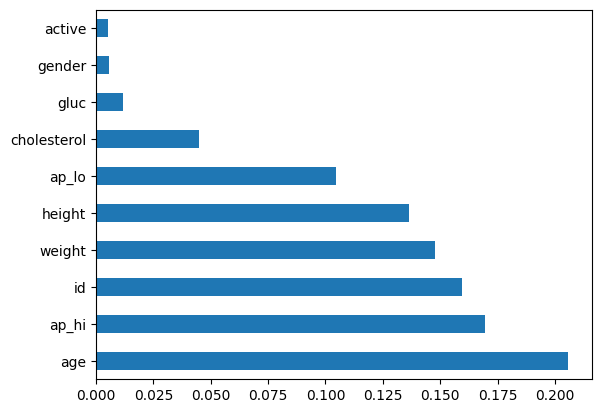

In [27]:
top.nlargest(10).plot(kind='barh')

<Axes: ylabel='Frequency'>

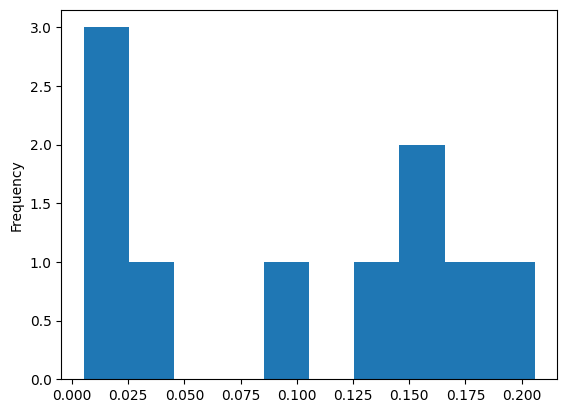

In [28]:
top.nlargest(10).plot(kind='hist')

<Axes: >

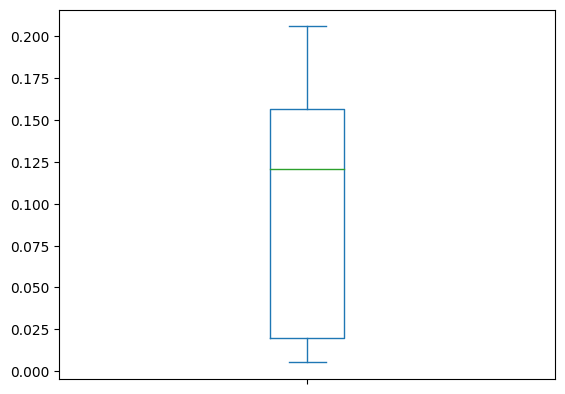

In [29]:
top.nlargest(10).plot(kind='box')

<Axes: >

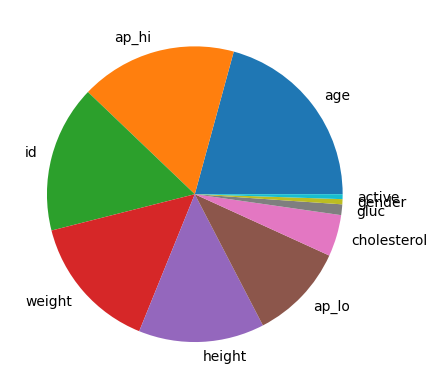

In [30]:
top.nlargest(10).plot(kind='pie')